In [47]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [39]:
class Analyzer:
    def __init__(self, num_spins, num_clauses, num_instances, number):
        self.num_spins = num_spins
        self.num_clauses = num_clauses
        self.num_instances = num_instances
        self.number = number
    
    def load_parameters(self):
        with open(
            f'ec3_spins{self.num_spins}_' +
            f'clauses{self.num_clauses}_' +
            f'instances{self.num_instances}_' +
            f'{self.number}.txt', 'r') as text_file:
            params = text_file.read()
            
        params = params.split('\n')
        params = [i.split('=')[1] for i in text[:7]]
        
        self.num_clauses_list = eval(params[1])
        self.num_runs_list = eval(params[3])
        self.temperature_list = eval(params[4])
        self.anneal_T = int(params[5])
        self.anneal_steps = int(params[6])
        
    def load_results(self):
        loaded_npz = np.load(
            f'ec3_spins{self.num_spins}_' +
            f'clauses{self.num_clauses}_' +
            f'instances{self.num_instances}_' +
            f'{self.number}.npz')
        self.res_clauses = loaded_npz['res_clauses']
        self.res_hamiltonian_diag = loaded_npz['res_hamiltonian_diag']
        self.res_mc_samples = loaded_npz['res_mc_samples']
        self.res_fidelity = loaded_npz['res_fidelity']
        
    def distribution(self, sampled_energies, full_energies):
        cnt_full = Counter(full_energies)
        
        
        cnt_mc = Counter(sampled_energies)
        ener = []
        occ = []
        for item in cnt_full:
            ener += [item]
            occ += [cnt_mc[item] / cnt_full[item]]

        ind = np.argsort(ener)
        return np.array(ener)[ind], np.array(occ)[ind]


In [162]:
analyzer = Analyzer(7, 9, 1000, 1)

In [163]:
analyzer.load_parameters()

In [164]:
analyzer.load_results()

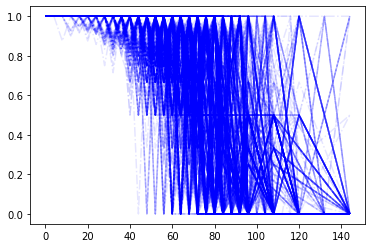

In [169]:
avg = 0
sizes = []
for ind_instance in range(analyzer.num_instances):
    x, y = analyzer.distribution(analyzer.res_mc_samples[ind_instance, 1, -1], \
                             analyzer.res_hamiltonian_diag[ind_instance])
    sizes += [len(x)]
    if len(x) == 25:
        avg += y
    plt.plot(x, y,'b-.',alpha=.1)

In [166]:
c = Counter(sizes)

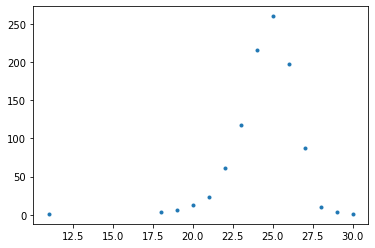

In [167]:
plt.plot([i[0] for i in c.items()], [i[1] for i in c.items()], '.')

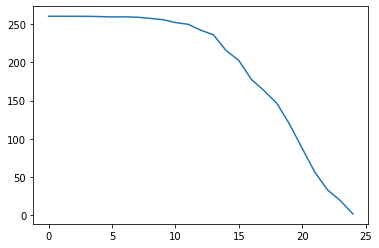

In [170]:
plt.plot(avg)

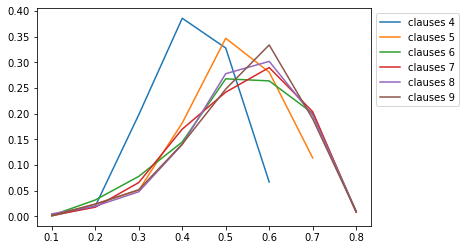

In [173]:
for clauses in [4, 5, 6, 7, 8, 9]:
    analyzer = Analyzer(7, clauses, 1000, 1)
    analyzer.load_results()
    
    cnt = Counter(analyzer.res_fidelity[:, -1].round(1))
    dist = [list(i) for i in cnt.items()]
    dist = np.array(dist)
    dist = dist.T
    dist = dist[:, dist[0].argsort()]
    
    plt.plot(dist[0], dist[1] / 1000, label = f'clauses {clauses}')
    
plt.legend(bbox_to_anchor = (1, 1))

In [286]:
binning = np.linspace(.2, .7, 6)

In [287]:
binning

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

In [288]:
hist = np.histogram(analyzer.res_fidelity[:, -1], bins = binning)

In [289]:
bin_rep = np.digitize(analyzer.res_fidelity[:, -1], binning)

In [296]:
bin_rep_inner = bin_rep[np.logical_and(bin_rep > 0, bin_rep < len(binning))]

In [290]:
hist

(array([ 39,  81, 216, 284, 316]), array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7]))

In [298]:
one_hot_rep = np.identity(len(binning) - 1)[bin_rep_inner - 1]

In [299]:
one_hot_rep.sum(axis = 0)

array([ 39.,  81., 216., 284., 316.])

In [242]:
for clauses in [4, 5, 6, 7, 8, 9]:
    analyzer = Analyzer(7, clauses, 1000, 1)
    analyzer.load_results()
    print(analyzer.res_fidelity[:, -1].max())

0.6235727998583669
0.748876867832639
0.788009643985077
0.8028645410241593
0.8096961008236119
0.7844681592525076
